# Fig. 1 The generic Hatano-Nelson model with different spectral winding numbers 

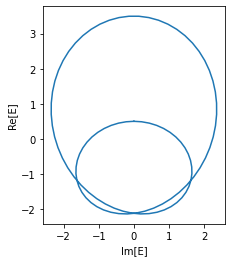

In [1]:
import cmath
import matplotlib.pyplot as plt
import numpy as np
from math import pi

t1 = 0
t2 = 0.5
t3 = 1
t4 = 2

def Polymal(k):
    z = cmath.exp(1j*k)
    H = t1*pow(z, -2) + t2*pow(z, -1) + t3*pow(z, 1) + t4*pow(z, 2)
    return H

K = np.linspace(-pi,pi,100)
el = []
for k in K:
    el.append(Polymal(k))
    
plt.plot(np.imag(el),np.real(el))
plt.xlabel('Im[E]')
plt.ylabel('Re[E]')
axes = plt.gca()
axes.set_aspect(1)
plt.show()

## PBC-OBC Interpolation过程中产生的峰

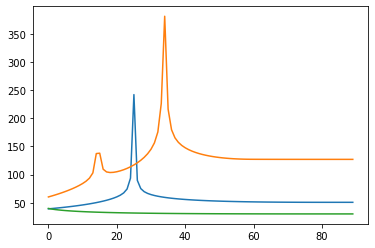

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# hoppings
t1 = 1
tm1 = 0.5
t2 = 2
tm2 = 0
#length of chain
N = 100
# Initialize Hamiltonian
def Ham(N,B):
    
    H = np.zeros([N,N])
    dim = H.shape[0]

    # filling matrice
    # 最近邻
    for i in range(dim-1):
        H[i, i+1] = t1
        H[i+1, i] = tm1
    # 次近邻
    for i in range(dim-2):
        H[i, i+2] = t2
        H[i+2, i] = tm2
    
    # Ends
    H[0, dim-2] = np.exp(-B)*tm2
    H[0, dim-1] = np.exp(-B)*tm1
    H[1, dim-1] = np.exp(-B)*tm2
    
    H[dim-2, 0] = np.exp(-B)*t2
    H[dim-1, 0] = np.exp(-B)*t1
    H[dim-1, 1] = np.exp(-B)*t2
    return H
################

er2 = 2.05 + 1j
Ilist = []
B = np.arange(0,90,1)
for b in B:
    evals = np.linalg.eigvals(Ham(N,b))
    I = np.sum(np.absolute(1/(evals - er2)))
    Ilist.append(I)
    
plt.plot(B, Ilist)

er1 = -0.96 + 1j
Ilist = []
B = np.arange(0,90,1)
for b in B:
    evals = np.linalg.eigvals(Ham(N,b))
    I = np.sum(np.absolute(1/(evals - er1)))
    Ilist.append(I)
plt.plot(B, Ilist)

er3 = 3.5 + 1j
Ilist = []
B = np.arange(0,90,1)
for b in B:
    evals = np.linalg.eigvals(Ham(N,b))
    I = np.sum(np.absolute(1/(evals - er3)))
    Ilist.append(I)
plt.plot(B, Ilist)
plt.show()

# Fig. 2 Quantized plateaus in the interpolation of the system between periodic and open boundary conditions.

## PBC-OBC Interpolation 过程中能谱的变化

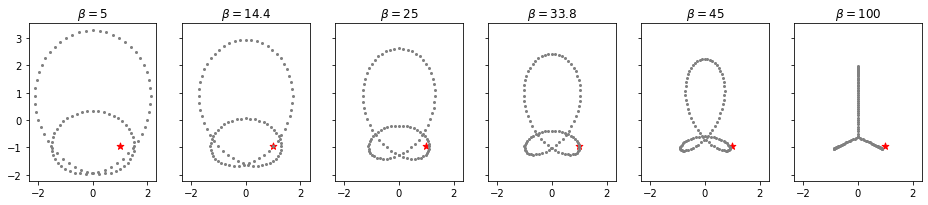

In [2]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# hoppings
t1 = 1
tm1 = 0.5
t2 = 2
tm2 = 0
#length of chain
N = 100
# Initialize Hamiltonian
def Ham(N,B):
    
    H = np.zeros([N,N])
    dim = H.shape[0]

    # filling matrice
    # 最近邻
    for i in range(dim-1):
        H[i, i+1] = t1
        H[i+1, i] = tm1
    # 次近邻
    for i in range(dim-2):
        H[i, i+2] = t2
        H[i+2, i] = tm2
    
    # Ends
    H[0, dim-2] = np.exp(-B)*tm2
    H[0, dim-1] = np.exp(-B)*tm1
    H[1, dim-1] = np.exp(-B)*tm2
    
    H[dim-2, 0] = np.exp(-B)*t2
    H[dim-1, 0] = np.exp(-B)*t1
    H[dim-1, 1] = np.exp(-B)*t2
    return H

##########################################
# 能谱
beta = [5, 14.4, 25, 33.8, 45, 100]
fig, axes = plt.subplots(1, len(beta), figsize=(16, 8), sharey=True, sharex=True)
for ii in range(len(beta)):
    dimham = Ham(N,beta[ii]).shape[0]
    elist = np.linalg.eig(Ham(N,beta[ii]))[0]
    
    axes[ii].plot(np.imag(elist),np.real(elist),'o', color = 'gray', markersize=2)
    axes[ii].scatter(1, -0.96, marker="*", c='red', s=50)
    axes[ii].set_title(r'$\beta = $' + str(beta[ii]))
    axes[ii].set_aspect('equal')
    


## PBC-OBC 过程中 ln($G_{1N}$) 变化

In [5]:
xlist = np.linspace(0, 90, 101) # 作为横轴的\beta
ylist = np.linspace(0, 90, 101) # 作为纵轴的log G1N
Er = -0.96 + 1j  # 费米能（参考能）
Ilist = []
for b in np.linspace(0, 90, 501):
    evals = np.linalg.eigvals(Ham(N, b))
    I = np.sum(np.abs(1/(evals - Er))) # matlab这里需要点除
    Ilist.append(I)

for i0 in range(len(xlist)):
    hamtemp = Ham(N, i0)  # i0 处的哈密顿量
    Identity = np.identity(len(hamtemp[0]))  # 用于直接求解格林函数的单位矩阵
    Gmat = np.linalg.inv(Er*Identity - hamtemp) # i0处哈密顿量相应的格林函数矩阵
    G1n = Gmat[0:2, len(Gmat)-2:len(Gmat)]  # 格林矩阵的右上角
    ylist[i0] = np.log(np.abs(np.linalg.det(G1n)))

deriviate = []
for ii in range(len(xlist)-1):
    dx = xlist[ii+1] - xlist[ii]
    df = ylist[ii+1] - ylist[ii]
    deriviate.append(df/dx)

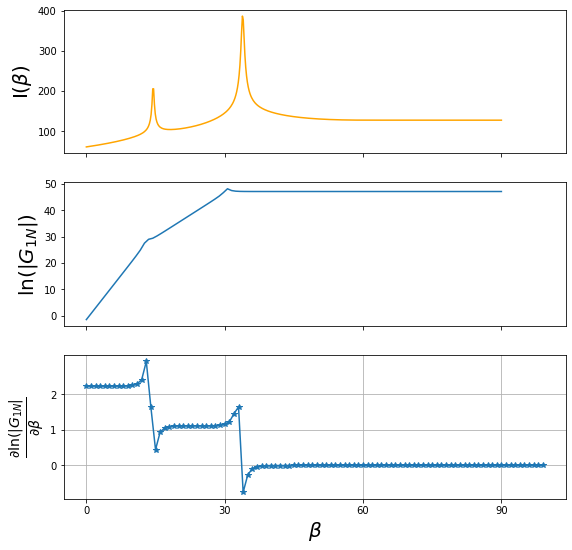

In [29]:
fig, axes = plt.subplots(3, 1,figsize=(9,9), sharex=True, squeeze=False)
axes[0, 0].plot(np.linspace(0, 90, 501), Ilist, color='orange')
axes[0, 0].set_xticks([0, 30, 60, 90])
axes[0, 0].axis('tight')
axes[0, 0].set_ylabel('I'+ r'$(\beta)$', fontsize=20)
axes[1, 0].plot(xlist, ylist)
axes[1, 0].set_xticks([0, 30, 60, 90])
axes[1, 0].axis('tight')
axes[1, 0].set_ylabel(r'$\ln(|G_{1N}|)$', fontsize=20)
axes[2, 0].plot(deriviate, marker='*')
axes[2, 0].set_yticks([0, 1, 2])
axes[2, 0].set_ylabel(r'$\frac{\partial \ln(|G_{1N}|}{\partial \beta}$', fontsize=20)
axes[2, 0].set_xlabel(r'$\beta$', fontsize=20)
axes[2, 0].grid()

## $\beta$ 很大时表面系统总格林函数矩阵

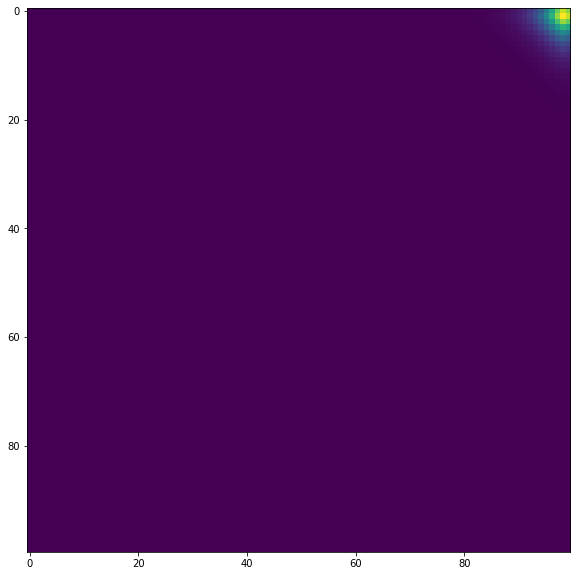

In [3]:
fig, axes = plt.subplots(figsize=(10,10))
Gall = np.linalg.inv(Er*Identity - hamtemp)
axes.imshow(np.abs(Gall))
